#Intro

In [0]:
import matplotlib.pyplot as plt
import collections

import unicodedata
import re
import numpy as np
import os
import io
import itertools


import random
import pickle
import os
sep = os.sep
import os.path

import pandas as pd
import bisect
import time
import scipy.stats as stats

import datetime

import glob

In [0]:

from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import metrics
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

import warnings; warnings.simplefilter('ignore')
from collections import Counter


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#1: Download Data

In [5]:
!wget "https://github.com/SpikeLab-CL/desafio_spike_cuencas/blob/master/caudal_extra.csv.zip"

#ESTO NO SE PORQUE NO FUNCIONO, TUVE QUE SUBIR EL ARCHIVO A MI DRIVE Y DESCARGARLO DESDE AHI
#!unzip /content/caudal_extra.csv.zip

path_data = ''


--2019-10-15 04:31:49--  https://github.com/SpikeLab-CL/desafio_spike_cuencas/blob/master/caudal_extra.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘caudal_extra.csv.zip.1’

caudal_extra.csv.zi     [ <=>                ]  64.69K  --.-KB/s    in 0.03s   

2019-10-15 04:31:50 (2.50 MB/s) - ‘caudal_extra.csv.zip.1’ saved [66244]



In [6]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)
path_data = 'drive/My Drive/Colab Notebooks/Spike_Test/Data/'


Mounted at /content/drive


In [0]:
data = pd.read_csv(path_data+"caudal_extra.csv.zip")


#2: 

In [8]:
data.head(2)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN


In [9]:
data.tail(2)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
1411178,1411178,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-29 00:00:00+00:00,23.682,7322001,Rio Maule En Longitudinal,0.0,27.598333
1411179,1411179,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-02-11 00:00:00+00:00,18.437,7322001,Rio Maule En Longitudinal,0.0,28.497999


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 17 columns):
Unnamed: 0                1411180 non-null int64
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null object
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: float64(5), int64(6), object(6

In [11]:
data.isnull().sum()

Unnamed: 0                     0
codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
dtype: int64

#3: Plots de precipitacion, temperatura y caudal

##3a) Escribir una función que tome como input una estación y haga plot de los datos para una columna.

In [0]:
data["tfecha"] = pd.to_datetime(data["fecha"])
data.tfecha = data["tfecha"]
data.index = pd.DatetimeIndex(data.tfecha)

In [0]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    datatoplot = data[data['codigo_estacion'] == codigo_estacion]
    datatoplot = datatoplot[datatoplot.index > fecha_min]
    datatoplot = datatoplot[datatoplot.index < fecha_max]
    datatoplot[columna].plot()


In [0]:
codigo_estacion = list(data["codigo_estacion"])[-1]
columna = "caudal"
fecha_min = "2017-01-01"
fecha_max = "2017-01-31"
time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max)


##3b) Escribir una función que tome como input una estación y haga plot de los datos para una columna.

In [0]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    datatoplot = data[data['codigo_estacion'] == codigo_estacion]
    datatoplot = datatoplot[datatoplot.index > fecha_min]
    datatoplot = datatoplot[datatoplot.index < fecha_max]
    datatoplot[columnas].plot()

In [0]:
codigo_estacion = list(data["codigo_estacion"])[-1]
columnas = ["caudal","precip_promedio"]
fecha_min = "2017-01-01"
fecha_max = "2017-01-31"
time_plot_una_estacion(codigo_estacion, columnas, fecha_min, fecha_max)

#4

In [0]:
data['estacion'] = (data.index.month%12 + 3)//3

In [0]:
dftest = data.head(1000)

In [0]:
dftesetgroup = data.groupby(['codigo_estacion','estacion'])[['caudal']].apply(lambda x :pd.Series(x.quantile(.95)))

In [0]:
dftesetgroup.head()

0.95                       caudal
codigo_estacion estacion         
1020003         1          1.2400
                2          0.8112
                3          0.2040
                4          0.1113
1021001         1         13.2000

In [0]:
def extreme_value(row, var):
   return dict_vars[var][(row['codigo_estacion'],row['estacion'])][var] < row[var]

In [0]:
var = 'caudal'
dict_vars = {}
dict_vars[var] = data.groupby(['codigo_estacion','estacion'])[[var]].apply(lambda x :pd.Series(x.quantile(.95)).to_dict()).to_dict()
data[var+'_extremo'] = data.apply (lambda row: extreme_value(row, var), axis=1)

In [0]:
var = 'precip_promedio'
dict_vars = {}
dict_vars[var] = data.groupby(['codigo_estacion','estacion'])[[var]].apply(lambda x :pd.Series(x.quantile(.95)).to_dict()).to_dict()
data[var+'_extremo'] = data.apply (lambda row: extreme_value(row, var), axis=1)

In [0]:
var = 'temp_max_promedio'
dict_vars = {}
dict_vars[var] = data.groupby(['codigo_estacion','estacion'])[[var]].apply(lambda x :pd.Series(x.quantile(.95)).to_dict()).to_dict()
data[var+'_extremo'] = data.apply (lambda row: extreme_value(row, var), axis=1)

In [0]:
data[var+'_extremo'].head()

tfecha
1960-01-06 00:00:00+00:00    False
1960-03-27 00:00:00+00:00    False
1960-05-07 00:00:00+00:00    False
1960-06-30 00:00:00+00:00    False
1960-07-22 00:00:00+00:00    False
Name: temp_max_promedio_extremo, dtype: bool

In [0]:
l = sorted(list(data.groupby(['codigo_cuenca'])['caudal_extremo'].sum()))
print(l)

[90.0, 234.0, 313.0, 315.0, 439.0, 477.0, 551.0, 642.0, 771.0, 1043.0, 1079.0, 1279.0, 1454.0, 1471.0, 1745.0, 2422.0, 2746.0, 3133.0, 3564.0, 3747.0, 3768.0, 3804.0, 4020.0, 4142.0, 4286.0, 4466.0, 5226.0, 5754.0, 7382.0]


#6

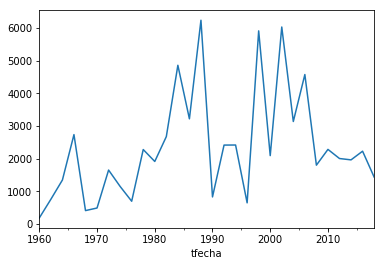

In [0]:
data["caudal_extremo"].resample('2Y').sum().plot()


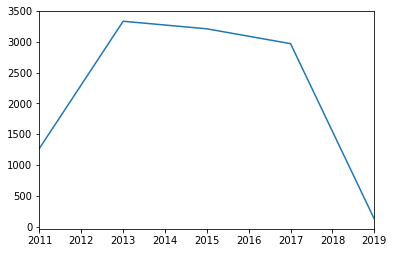

In [54]:
data["precip_promedio_extremo"].resample('2Y').sum().plot()


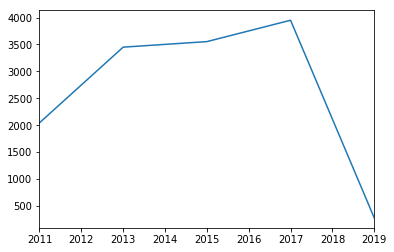

In [55]:
data["temp_max_promedio_extremo"].resample('2Y').sum().plot()


#7

Lets see the class distribution.

In [0]:
c = Counter(list(data["caudal_extremo"]))
c

Counter({False: 1340817, True: 70363})

We are interested in predicting for the next years, so we will consider only recent years from 2010. 

In [0]:
data = data[data.index.year > 2010]

Plot time lapse between samples.

In [0]:
data.index.name = None
data.sort_values(["codigo_estacion","tfecha"], inplace=True)
data['delta'] = (data['tfecha']-data['tfecha'].shift()).fillna(0)
lapses = data[data["delta"]>=pd.Timedelta(1,'D')]
lapses["delta"].value_counts().sort_index()#.plot()

Keep only the rows with measures in consecutive days. We will make predictions for the next day considering the measures from current day.

In [0]:
data = data[data["delta"]==pd.Timedelta(1,'D')]
data["delta"].value_counts().sort_index()#.plot()

1 days    245075
Name: delta, dtype: int64

Keep only rows with measures from the same "estacion"

In [0]:
data["next_codigo_estacion"] = data["codigo_estacion"].shift(-1)
data = data[data["codigo_estacion"]==data["next_codigo_estacion"]]


(245075, 24)

Make the classes numerical for sklearn

In [0]:
le = LabelEncoder()
data["caudal_extremo"] = le.fit_transform(data["caudal_extremo"])

Shift the column "caudal_extremo" for the predictions.

In [0]:
data["y"] = data["caudal_extremo"].shift(-1)
data.dropna(inplace=True)

###Features for prediction.

Binary Features:
    
*   caudal_extremo
*   precipitaciones_extremo
*   temperatura_extremo 

Features A Normalizar:

*   caudal
*   precipitaciones
*   temperatura
*   altura


Features to binarize:

*   codigo_estacion
*   codigo_cuenca


In [0]:
data.columns

Index(['Unnamed: 0', 'codigo_estacion', 'institucion', 'fuente', 'nombre',
       'altura', 'latitud', 'longitud', 'codigo_cuenca', 'nombre_sub_cuenca',
       'cantidad_observaciones', 'fecha', 'caudal', 'gauge_id', 'gauge_name',
       'precip_promedio', 'temp_max_promedio', 'tfecha', 'estacion',
       'caudal_extremo', 'precip_promedio_extremo',
       'temp_max_promedio_extremo', 'delta', 'next_codigo_estacion', 'y'],
      dtype='object')

In [0]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
np.random.seed(0)

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['caudal', 'precip_promedio',"temp_max_promedio","altura"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['codigo_estacion', 'codigo_cuenca']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

X = data[['caudal', 'precip_promedio',"temp_max_promedio","altura",'codigo_estacion', 'codigo_cuenca',"caudal_extremo", "precip_promedio", "temp_max_promedio"]]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))



              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     43597
         1.0       0.53      0.07      0.13      1338

    accuracy                           0.97     44935
   macro avg       0.75      0.53      0.56     44935
weighted avg       0.96      0.97      0.96     44935

[[43513    84]
 [ 1243    95]]


#8

##8a)

We show metrics accuracy, precision, recall and F1. This a problem with class unbalance. We can see that despite the model being bad at predicting the extreme values, accuracy is good, which is a problem with accuracy, that is not a good metric under class unbalance settings. Looking at the metrics and the confusion matrix we can see that model is biased towards the majority class(not a extreme value) and it shows very low recall for the important class(extreme values)

In [0]:
print("Baseline simple prediciendo la medicion del dia anterior")
print(classification_report(y_test, X_test["caudal_extremo"]))
print(confusion_matrix(y_test, X_test["caudal_extremo"]))

Baseline simple prediciendo la medicion del dia anterior
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     43597
         1.0       0.74      0.75      0.74      1338

    accuracy                           0.98     44935
   macro avg       0.87      0.87      0.87     44935
weighted avg       0.98      0.98      0.98     44935

[[43240   357]
 [  332  1006]]


##8b) Precision-Recall

In the cell we plot a precision-recall curve. With the precision-recall curve we can select a threshold to get an specific desired precision or recall.

Text(0.5, 1.0, 'Precision-Recall curve')

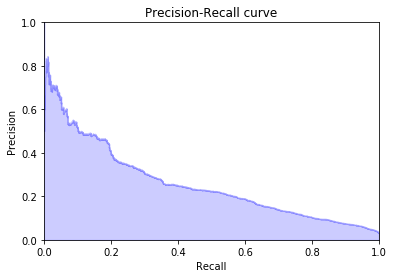

In [52]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall curve")


Lets see which precision do we get if we want to get a 0.7 recall.

In [53]:
i = 0
l = list(recall)
while l[i]>0.7:
    i += 1
precision[i]

0.13870776526378187